In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Read Data

In [59]:
places = pd.read_csv('Places Dataset.xlsx - places_final_dataset.csv')
users = pd.read_csv('Visitors Preference Dataset.xlsx - user_data_version_3_10K_Users.csv')

## Check data samples

In [60]:
places.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


* Data set includes Nan values for ratings. So we need to add ratings using LLM model that would be better

In [61]:
users.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell..."
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati..."
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba..."
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C..."
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle..."


* Need to check whether the prefferd activities are taken from a dropdown list or simply typed by each one.
* Need to check above thing also for the bucket list
* If they are selected from a drop down, totally fine.
* Otherwise we need to categories activities into several unique activities and places to be match with places in the places table

## Check shapes

In [62]:
print("Shape of places table:",places.shape)
print("Shape of users table:",users.shape)

Shape of places table: (411, 7)
Shape of users table: (10000, 5)


## Columns

In [63]:
print("Description of places table:\n",places.describe())
print("Description of users table:\n",users.describe())

Description of places table:
               lat         lng      rating  user_ratings_total
count  410.000000  410.000000  355.000000          355.000000
mean     7.304668   80.583211    4.459437         1608.639437
std      0.994841    0.518571    0.433211         3607.678752
min      5.941381   79.694183    0.900000           27.000000
25%      6.629356   80.213274    4.300000          147.000000
50%      7.012780   80.536523    4.500000          375.000000
75%      7.947930   80.946773    4.750000         1245.500000
max      9.820859   81.859583    5.000000        26736.000000
Description of users table:
            User ID
count  10000.00000
mean    5000.50000
std     2886.89568
min        1.00000
25%     2500.75000
50%     5000.50000
75%     7500.25000
max    10000.00000


## Info

In [64]:
print("Info of places table:\n",places.info())
print("Info of users table:\n",users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                411 non-null    object 
 1   lat                 410 non-null    float64
 2   lng                 410 non-null    float64
 3   formatted_address   411 non-null    object 
 4   rating              355 non-null    float64
 5   user_ratings_total  355 non-null    float64
 6   latest_reviews      411 non-null    object 
dtypes: float64(4), object(3)
memory usage: 22.6+ KB
Info of places table:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   User ID                             10000 non-null  int64 
 1   Name                                10000 non-null  object
 2   Email 

* Nan in Users = 0
* Nan in Places = lat,lng = 1, rating,user rating total = 56, 

# Data Validation

## Check activities

In [65]:
p = users['Preferred Activities'].unique()

* *Activities are from a dropdown selection. Great!*

## Check Places

### Remove non-English characters

In [66]:
import re

def clean_text(text):
    # Remove all characters except alphabets, numbers, and punctuation
    #cleaned = re.sub(r'[^\w\s.,!?;:()-]', '', str(text))
    cleaned = re.sub(r'[^A-Za-z\s.,]', '', str(text))
    # Normalize spaces
    cleaned = re.sub(r'\s+', ' ', cleaned)
    return cleaned.strip()

# Apply the cleaning function to the 'name' and 'latest_reviews' columns in the places dataframe
places['name'] = places['name'].apply(clean_text)
places['latest_reviews'] = places['latest_reviews'].apply(clean_text)

# Clean the bucket list destinations in the users dataframe
users['Bucket list destinations Sri Lanka'] = users['Bucket list destinations Sri Lanka'].apply(clean_text)

# Print a sample of the cleaned dataframes to verify
print("Sample of cleaned places dataframe:")
print(places[['name', 'latest_reviews']].head())

print("\nSample of cleaned users dataframe:")
print(users['Bucket list destinations Sri Lanka'].head())

# Export names to a CSV file

# Create a DataFrame with the place names
place_names_df = pd.DataFrame(places[['name', 'latest_reviews']])

# Export the DataFrame to a CSV file
#csv_filename = 'unique_place_names.csv'
#place_names_df.to_csv(csv_filename, index=False)

#print(f"Unique place names have been exported to {csv_filename}")


Sample of cleaned places dataframe:
                           name  \
0              Arugam Bay Beach   
1                 Mirissa Beach   
2  Weligama Beach surf and stay   
3                      Ahangama   
4               Hikkaduwa Beach   

                                      latest_reviews  
0  Arugam Bay Beach is a surfers paradise I spent...  
1  Mirissa Beach is truly a gem on Sri Lankas sou...  
2  Weligama Beach is a fantastic spot for both be...  
3  Ahangama was a bit disappointing for me as a s...  
4  Hikkaduwa Beach is a delightful escape for sol...  

Sample of cleaned users dataframe:
0    Polonnaruwa, Hatton, Anuradhapura, Ella, Haputale
1    Madunagala Hot Water Spring, Wilpattu National...
2    Mirissa Beach, Negombo Lagoon, Batadombalena C...
3    Maha Oya Hot Water Springs, Colombo Port City,...
4    Negombo Lagoon, Colombo Port City, Galle Dutch...
Name: Bucket list destinations Sri Lanka, dtype: object


### Identifying unmatched places and match them

In [67]:
def extractBucketPlacesList(s):
    s=s.replace('[','')
    s=s.replace(']','')
    s=s.replace('/','')
    s=s.replace('\\','')
    s=s.replace('\'','')
    s=s.replace('\"','')
    s=s.lower()
    ##s=s.replace(' ','')
    
    s=s.split(',')
    for i in range(len(s)):
        s[i]=s[i].strip()
    return s

In [68]:
# Step 1: Clean and prepare the place names from 'places' dataframe
places_set = set(places['name'].str.lower().str.strip())

# Step 2: Clean and prepare the bucket list destinations from 'users' dataframe
bucket_list_set = set()
for destinations in users['Bucket list destinations Sri Lanka']:
    bucket_list_set.update(extractBucketPlacesList(destinations))

# Step 3: Compare the two sets
places_in_both = places_set.intersection(bucket_list_set)
places_only_in_places = places_set - bucket_list_set
places_only_in_bucket_list = bucket_list_set - places_set

# Step 4: Print the results
print("Places that appear in both datasets:")
print(places_in_both)
print(f"\nNumber of places in both datasets: {len(places_in_both)}")

print("\nPlaces that appear only in the 'places' dataframe:")
print(places_only_in_places)
print(f"\nNumber of places only in 'places' dataframe: {len(places_only_in_places)}")

print("\nPlaces that appear only in the users' bucket list:")
print(places_only_in_bucket_list)
print(f"\nNumber of places only in bucket list: {len(places_only_in_bucket_list)}")

print(f"\nTotal unique places in 'places' dataframe: {len(places_set)}")
print(f"Total unique places in users' bucket list: {len(bucket_list_set)}")


Places that appear in both datasets:
{'hikkaduwa', 'devon falls', 'minneriya national park', 'anuradhapura', 'pidurangala rock', 'kalpitiya', 'belihuloya', 'sri pada adams peak', 'surathali ella', 'polonnaruwa ancient city', 'colombo national museum', 'dambulla royal cave temple and golden temple', 'mihintale', 'gangaramaya temple', 'sri lanka planetarium', 'negombo', 'galle', 'nilaveli beach', 'rekawa beach', 'tangalle beach', 'pinnawala elephant orphanage', 'national gallery of art', 'jungle beach', 'mirissa beach', 'jaffna public library', 'bolgoda lake', 'velgam vehera buddhist temple', 'bambarakiri ella', 'uppuveli beach', 'ahangama', 'trincomalee harbour', 'colombo city tour', 'bopath falls', 'dunhinda waterfall', 'bundala national park', 'ramboda falls', 'viharamahadevi park', 'polonnaruwa', 'kumana national park', 'nelung arts centre', 'hikkaduwa beach', 'kandalama', 'kandy national museum', 'peradeniya', 'weligama beach surf and stay', 'kalpitiya lagoon', 'wasgamuwa national p

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def preprocess(text):
    return text.lower().strip()

# Preprocess place names
places_list = [preprocess(place) for place in places['name']]
bucket_list = [preprocess(place) for place in places_only_in_bucket_list]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the places_list
places_tfidf = vectorizer.fit_transform(places_list)

# Transform the bucket_list
bucket_tfidf = vectorizer.transform(bucket_list)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(bucket_tfidf, places_tfidf)

# Find the best match for each bucket list place
best_matches = similarity_matrix.argmax(axis=1)
match_scores = similarity_matrix.max(axis=1)

# Create a dictionary to store the matches
place_matches = {}
for i, (bucket_place, best_match_index, score) in enumerate(zip(bucket_list, best_matches, match_scores)):
    if score > 0.7:  # Increased threshold for higher accuracy
        place_matches[bucket_place] = places_list[best_match_index]

# Create a new dataframe with the matches
matched_places = pd.DataFrame(list(place_matches.items()), columns=['Bucket List Name', 'Matched Place'])

print("Matched places:")
print(matched_places)
print(f"\nNumber of matched places: {len(matched_places)}")
print(f"Number of unmatched places: {len(places_only_in_bucket_list) - len(matched_places)}")

# Update the users dataframe with matched place names
def update_bucket_list(bucket_list):
    updated_list = []
    for place in extractBucketPlacesList(bucket_list):
        place_lower = place.lower().strip()
        if place_lower in place_matches:
            updated_list.append(place_matches[place_lower])
        else:
            updated_list.append(place)
    return str(updated_list)

users['Updated Bucket List'] = users['Bucket list destinations Sri Lanka'].apply(update_bucket_list)

print("\nSample of updated users dataframe:")
print(users[['Bucket list destinations Sri Lanka', 'Updated Bucket List']].head())

# Recalculate the sets after updating
updated_bucket_list_set = set()
for destinations in users['Updated Bucket List']:
    updated_bucket_list_set.update(extractBucketPlacesList(destinations))

updated_places_in_both = places_set.intersection(updated_bucket_list_set)
updated_places_only_in_bucket_list = updated_bucket_list_set - places_set

print(f"\nUpdated number of places in both datasets: {len(updated_places_in_both)}")
print(f"Updated number of places only in bucket list: {len(updated_places_only_in_bucket_list)}")

# Get the unmatched places
unmatched_places = set(places_only_in_bucket_list) - set(place_matches.keys())

print("\nUnmatched places:")
print(unmatched_places)
print(f"\nNumber of unmatched places: {len(unmatched_places)}")


Matched places:
                   Bucket List Name                         Matched Place
0                   st clairs falls                       st. clair falls
1   batatotalena batadombalena cave                         batadombalena
2        arankelle forest monastery              n uyana forest monastery
3                      kandy temple                                 kandy
4                        galle fort                      galle dutch fort
5             anawilundawa wetlands                  anawilundawa wetland
6                victoria golf club               royal colombo golf club
7              ratnapura gem museum                    dhanaja gem museum
8                     horton plains           horton plains national park
9               kanniya hot springs             kanniya hot water springs
10         dry zone botanic gardens  dry zone botanic gardens, hambantota
11                         perl bay                       dutch bay beach
12                   r

In [70]:
# Further match unmatched places using fuzzy matching
from fuzzywuzzy import process

def get_best_fuzzy_match(name, choices, cutoff=80):
    match = process.extractOne(name, choices)
    return match[0] if match and match[1] >= cutoff else None

places_list = places['name'].tolist()

additional_fuzzy_matches = {}
for unmatched_place in unmatched_places:
    best_match = get_best_fuzzy_match(unmatched_place, places_list)
    if best_match:
        additional_fuzzy_matches[unmatched_place] = best_match

# Update place_matches with additional fuzzy matches
place_matches.update(additional_fuzzy_matches)

# Update the users dataframe again with the new fuzzy matches
def update_bucket_list_fuzzy(bucket_list):
    updated_list = []
    for place in extractBucketPlacesList(bucket_list):
        place_lower = place.lower().strip()
        if place_lower in place_matches:
            updated_list.append(place_matches[place_lower])
        else:
            updated_list.append(place)
    return str(updated_list)

users['Updated Bucket List'] = users['Updated Bucket List'].apply(update_bucket_list_fuzzy)

# Recalculate the sets after updating with fuzzy matches
final_fuzzy_bucket_list_set = set()
for destinations in users['Updated Bucket List']:
    final_fuzzy_bucket_list_set.update(extractBucketPlacesList(destinations))

final_fuzzy_places_in_both = places_set.intersection(final_fuzzy_bucket_list_set)
final_fuzzy_places_only_in_bucket_list = final_fuzzy_bucket_list_set - places_set

print("\nAfter fuzzy matching:")
print(f"Final number of places in both datasets: {len(final_fuzzy_places_in_both)}")
print(f"Final number of places only in bucket list: {len(final_fuzzy_places_only_in_bucket_list)}")

# Get the remaining unmatched places after fuzzy matching
remaining_unmatched_places = set(final_fuzzy_places_only_in_bucket_list)

print("\nRemaining unmatched places after fuzzy matching:")
print(remaining_unmatched_places)
print(f"\nNumber of remaining unmatched places: {len(remaining_unmatched_places)}")

# Print out the matches for initially unmatched places
print("\nMatches found for initially unmatched places:")
for original, matched in additional_fuzzy_matches.items():
    print(f"{original} -> {matched}")




After fuzzy matching:
Final number of places in both datasets: 127
Final number of places only in bucket list: 4

Remaining unmatched places after fuzzy matching:
{'vaddha village camping', 'dry zone botanic gardens', 'hambantota', 'hatton'}

Number of remaining unmatched places: 4

Matches found for initially unmatched places:
kithulgala -> Kitulgala
negambo -> Negombo
royal botanical gardens -> Dambulla Royal Cave Temple and Golden Temple
weligama beach -> Weligama Beach surf and stay
kosgoda turtle hatchery -> Victor Hasselblad Sea Turtle Research And Conservation Centre
passikuda beach -> Pasikuda Beach
polonaruwa -> Polonnaruwa
excel world -> Water World Aquarium
hikkaduwa coral sanctuary -> Hikkaduwa
folk museum -> Martin Wickramasinghe Folk Museum
mahalenama cave -> Dambulla Royal Cave Temple and Golden Temple
ella -> Ella Rock Trailhead
ella gap -> Ella Rock Trailhead
water world lanka -> Maha Oya Hot Water Springs
belilena caves -> Belilena Cave
nallur kandaswamy kovil -> Nal

In [71]:
# Display info for updated users dataframe
print("\nUpdated Users DataFrame Info:")
users.info()

# Display info for updated places dataframe
print("\nUpdated Places DataFrame Info:")
places.info()

# Display sample rows from both dataframes
print("\nSample rows from Updated Users DataFrame:")
print(users.head())

print("\nSample rows from Updated Places DataFrame:")
print(places.head())

# Display unique values in 'Updated Bucket List' column
print("\nUnique values in 'Updated Bucket List' column:")
print(users['Updated Bucket List'].nunique())

# Display value counts for 'name' column in places dataframe
print("\nValue counts for 'name' column in Places DataFrame:")
print(places['name'].value_counts().head())



Updated Users DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   User ID                             10000 non-null  int64 
 1   Name                                10000 non-null  object
 2   Email                               10000 non-null  object
 3   Preferred Activities                10000 non-null  object
 4   Bucket list destinations Sri Lanka  10000 non-null  object
 5   Updated Bucket List                 10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB

Updated Places DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                411 non-null    object 
 1   lat       

Shape of places DataFrame: (411, 7)

Columns in places DataFrame: Index(['name', 'lat', 'lng', 'formatted_address', 'rating',
       'user_ratings_total', 'latest_reviews'],
      dtype='object')

Sample of places DataFrame:
                           name       lat        lng  \
0              Arugam Bay Beach  6.840408  81.836848   
1                 Mirissa Beach  5.944703  80.459161   
2  Weligama Beach surf and stay  5.972486  80.435714   
3                      Ahangama  5.973975  80.362159   
4               Hikkaduwa Beach  6.137727  80.099060   

             formatted_address  rating  user_ratings_total  \
0  Arugam Bay Beach, Sri Lanka     4.8              1591.0   
1           Mirissa, Sri Lanka     4.6              1748.0   
2          Weligama, Sri Lanka     4.4               325.0   
3          Ahangama, Sri Lanka     NaN                 NaN   
4   Hikkaduwa Beach, Sri Lanka     4.7              1438.0   

                                      latest_reviews  
0  Arugam 

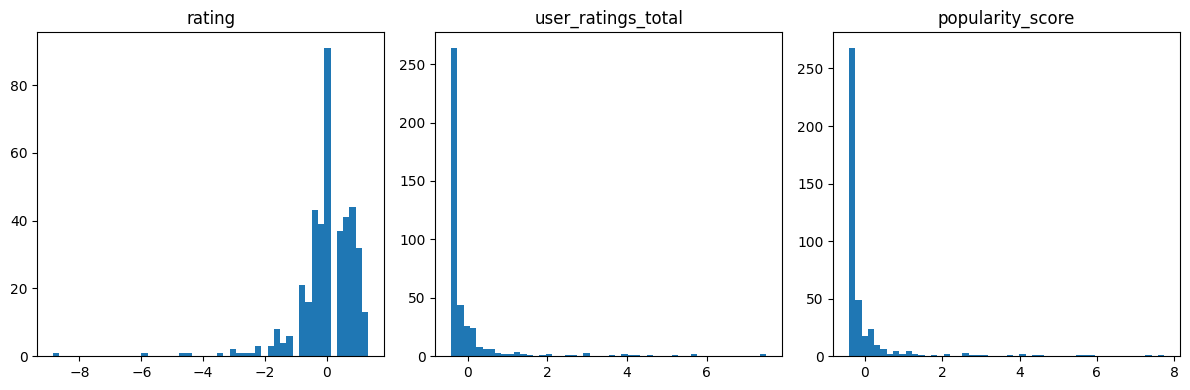

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'places' is your DataFrame
# If not, load it first:
# places = pd.read_csv('your_places_file.csv')

# Diagnostic steps
print("Shape of places DataFrame:", places.shape)
print("\nColumns in places DataFrame:", places.columns)
print("\nSample of places DataFrame:")
print(places.head())

# Check for null values
print("\nNull values in places DataFrame:")
print(places.isnull().sum())

# Check data types
print("\nData types of columns:")
print(places.dtypes)

# Check specific columns
print("\nUnique values in 'rating':", places['rating'].unique())
print("Unique values in 'user_ratings_total':", places['user_ratings_total'].unique())

# Check if all values are NaN
print("\nAll values NaN in 'rating':", places['rating'].isna().all())
print("All values NaN in 'user_ratings_total':", places['user_ratings_total'].isna().all())

# If there are non-NaN values, print some statistics
if not places['rating'].isna().all():
    print("\nStatistics for 'rating':")
    print(places['rating'].describe())

if not places['user_ratings_total'].isna().all():
    print("\nStatistics for 'user_ratings_total':")
    print(places['user_ratings_total'].describe())

# Handle missing values
places['rating'] = places['rating'].fillna(places['rating'].mean())
places['user_ratings_total'] = places['user_ratings_total'].fillna(places['user_ratings_total'].median())

# Create popularity score
places['popularity_score'] = places['rating'] * places['user_ratings_total']

# Check the resulting features
print("\nSample of features before scaling:")
print(places[['rating', 'user_ratings_total', 'popularity_score']].head())

# Prepare the features
features = ['rating', 'user_ratings_total', 'popularity_score']

# Check if we have any valid data to scale
if places[features].shape[0] > 0 and not places[features].isnull().all().all():
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(places[features])

    # Create a DataFrame with the scaled features
    places_features = pd.DataFrame(scaled_features, columns=features, index=places.index)

    print("\nSample of scaled features:")
    print(places_features.head())

    print("\nShape of features matrix:", places_features.shape)

    # If you want to see the correlation between features
    print("\nCorrelation between features:")
    print(places_features.corr())

    # Visualize the distribution of the scaled features
    plt.figure(figsize=(12, 4))
    for i, feature in enumerate(features):
        plt.subplot(1, 3, i+1)
        plt.hist(places_features[feature], bins=50)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

else:
    print("No valid data to scale. Please check your data.")
    # Create an empty DataFrame to avoid NameError
    places_features = pd.DataFrame()

In [73]:

# Further match unmatched places using difflib
import difflib

def get_closest_match(name, choices, cutoff=0.6):
    matches = difflib.get_close_matches(name, choices, n=1, cutoff=cutoff)
    return matches[0] if matches else None

places_list = places['name'].tolist()

additional_matches = {}
for unmatched_place in unmatched_places:
    closest_match = get_closest_match(unmatched_place, places_list)
    if closest_match:
        additional_matches[unmatched_place] = closest_match

# Update place_matches with additional matches
place_matches.update(additional_matches)

# Update the users dataframe again with the new matches
def update_bucket_list_again(bucket_list):
    updated_list = []
    for place in extractBucketPlacesList(bucket_list):
        if place in place_matches:
            updated_list.append(place_matches[place])
        else:
            updated_list.append(place)
    return str(updated_list)

users['Updated Bucket List'] = users['Updated Bucket List'].apply(update_bucket_list_again)

# Recalculate the sets after updating
final_bucket_list_set = set()
for destinations in users['Updated Bucket List']:
    final_bucket_list_set.update(extractBucketPlacesList(destinations))

final_places_in_both = places_set.intersection(final_bucket_list_set)
final_places_only_in_bucket_list = final_bucket_list_set - places_set

print(f"\nFinal number of places in both datasets: {len(final_places_in_both)}")
print(f"Final number of places only in bucket list: {len(final_places_only_in_bucket_list)}")

# Get the remaining unmatched places
remaining_unmatched_places = set(final_places_only_in_bucket_list)

print("\nRemaining unmatched places:")
print(remaining_unmatched_places)
print(f"\nNumber of remaining unmatched places: {len(remaining_unmatched_places)}")


Final number of places in both datasets: 127
Final number of places only in bucket list: 4

Remaining unmatched places:
{'vaddha village camping', 'dry zone botanic gardens', 'hambantota', 'hatton'}

Number of remaining unmatched places: 4


* These places are not in our data set

In [74]:
# Save the updated places dataframe
places.to_csv('updated_places_dataset.csv', index=False)

# Save the updated users dataframe
users.to_csv('updated_users_dataset.csv', index=False)

print("Updated dataframes have been saved to CSV files.")

Updated dataframes have been saved to CSV files.


# Data Preprocessing

* No problem in Users
* But need to check on null values in places

In [75]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # Import tqdm for progress logging

# Load the saved dataframes
places = pd.read_csv('updated_places_dataset.csv')
users = pd.read_csv('updated_users_dataset.csv')

# List of candidate activities
candidate_activities = [
    'amusement parks', 'animal encounters', 'archaeological sites', 'architecture photography', 
    'architecture tours', 'art classes', 'arts and culture', 'ayurvedic spa treatments', 
    'beach visits', 'beachfront dining', 'bird watching', 'boat safaris', 'botanical gardens', 
    'butterfly watching', 'camping', 'caving', 'city tours', 'craft workshops', 'cultural experiences', 
    'cultural festivals', 'cycling', 'elephant rides', 'fishing', 'golfing', 'hiking', 'historic sites', 
    'historic walks', 'historical monuments', 'history tours', 'horse shows', 'horseback riding', 
    'hot air ballooning', 'hot springs', 'kayaking', 'landscape photography', 'literary tours', 
    'local crafts', 'mountain biking', 'museum visits', 'outdoor adventures', 'paddleboarding', 
    'photography', 'planetarium visits', 'public art installations', 'river cruises', 'rock climbing', 
    'safaris', 'sailing', 'sailing lessons', 'scuba diving', 'sea cruises', 'sightseeing', 'snorkeling', 
    'spiritual retreats', 'surfing', 'tea tasting', 'temple pilgrimages', 'theater', 'themed parks', 
    'traditional ceremonies', 'turtle watching', 'village homestays', 'water parks', 'waterfalls', 
    'whale watching', 'wildlife viewing', 'yoga retreats', 'zip-lining'
]

# Function to extract activities from reviews using TF-IDF and cosine similarity
def extract_activities(reviews):
    # Combine the review with the candidate activities
    documents = [reviews] + candidate_activities

    # Convert the documents to TF-IDF vectors
    vectorizer = TfidfVectorizer().fit_transform(documents)
    vectors = vectorizer.toarray()

    # Calculate cosine similarity between the review and each candidate activity
    cosine_similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

    # Get the indices of the top 3 activities
    top_indices = cosine_similarities.argsort()[-3:][::-1]
    top_activities = [candidate_activities[i] for i in top_indices]

    return top_activities  # Return top 3 activities

# Apply the function to the latest_reviews column with a progress bar
tqdm.pandas(desc="Extracting activities for places")
places['extracted_activities'] = places['latest_reviews'].progress_apply(extract_activities)

print("Activity extraction completed for all places.")

# Save the updated places dataframe to a CSV file
places.to_csv('places_with_extracted_activities.csv', index=False)

print("Updated places dataframe saved to 'places_with_extracted_activities.csv'")


Extracting activities for places: 100%|██████████| 411/411 [00:00<00:00, 459.71it/s]

Activity extraction completed for all places.
Updated places dataframe saved to 'places_with_extracted_activities.csv'


* *Try to Do recommendation*

In [76]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import logging
from tqdm import tqdm

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the data
logging.info("Loading data...")
places = pd.read_csv('Cleaned_places_data.csv')
users = pd.read_csv('Cleaned_user_data.csv')

# Preprocess the data
logging.info("Preprocessing data...")

# Create dictionaries to map activities and places to indices
activity_to_idx = {activity: idx for idx, activity in enumerate(eval(places['extracted_activities'].iloc[0]))}
place_to_idx = {place: idx for idx, place in enumerate(places['name'])}

# Vectorize activities and places
def activities_to_vector(activities):
    vector = np.zeros(len(activity_to_idx))
    for act in eval(activities):
        if act.strip() in activity_to_idx:
            vector[activity_to_idx[act.strip()]] = 1
    return vector

places['activity_vector'] = places['extracted_activities'].apply(activities_to_vector)
users['preferred_activity_vector'] = users['Preferred Activities'].apply(activities_to_vector)

# Normalize ratings and user_ratings_total
scaler = MinMaxScaler()
places[['normalized_rating', 'normalized_user_ratings_total']] = scaler.fit_transform(places[['rating', 'user_ratings_total']])

# Calculate popularity score
places['popularity_score'] = places['normalized_rating'] * places['normalized_user_ratings_total']

# Prepare the data for the model
logging.info("Preparing data for the model...")

def prepare_data(user_data, place_data):
    X = []
    y = []
    for _, user in user_data.iterrows():
        user_activities = user['preferred_activity_vector']
        for _, place in place_data.iterrows():
            place_activities = place['activity_vector']
            
            activity_overlap = np.dot(user_activities, place_activities) / (np.sum(user_activities) + 1e-8)
            
            X.append(np.concatenate([
                [activity_overlap],
                [place['normalized_rating']],
                [place['normalized_user_ratings_total']],
                [place['popularity_score']]
            ]))
            y.append(activity_overlap)  # Use activity overlap as the target
    
    return np.array(X), np.array(y)

X, y = prepare_data(users.head(1000), places)  # Use a subset of users for faster processing

# Build the model
logging.info("Building the model...")

inputs = Input(shape=(4,))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
logging.info("Training the model...")
history = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=64, verbose=1)

# Make predictions
logging.info("Making predictions...")

def predict_places(user, place_data, model):
    user_activities = user['preferred_activity_vector']
    predictions = []
    X = []
    for _, place in place_data.iterrows():
        place_activities = place['activity_vector']
        
        activity_overlap = np.dot(user_activities, place_activities) / (np.sum(user_activities) + 1e-8)
        
        X.append([
            activity_overlap,
            place['normalized_rating'],
            place['normalized_user_ratings_total'],
            place['popularity_score']
        ])
    
    X = np.array(X)
    predictions = model.predict(X).flatten()
    
    top_indices = np.argsort(predictions)[-5:][::-1]
    return [(place_data.iloc[i]['name'], predictions[i]) for i in top_indices]

# Make predictions for all users
all_predictions = []
for _, user in tqdm(users.iterrows(), total=len(users), desc="Making predictions"):
    user_predictions = predict_places(user, places, model)
    all_predictions.append({
        'User ID': user['User ID'],
        'Name': user['Name'],
        'Email': user['Email'],
        'Recommended Places': [place for place, _ in user_predictions]
    })

# Save the results
logging.info("Saving results...")
results_df = pd.DataFrame(all_predictions)
results_df.to_csv('user_place_recommendations.csv', index=False)
logging.info("Results saved to 'user_place_recommendations.csv'")

logging.info("Recommendation process completed.")

Generating recommendations: 100%|██████████| 10000/10000 [00:28<00:00, 351.44it/s]

Recommendations saved to 'improved_user_place_recommendations.csv'


# XGBOOST

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tqdm import tqdm

# Load data
places = pd.read_csv('Cleaned_places_data.csv')
users = pd.read_csv('Cleaned_user_data.csv')

# Preprocess data
def preprocess_activities(activities):
    return [act.strip() for act in eval(activities)]

places['activities'] = places['extracted_activities'].apply(preprocess_activities)
users['preferred_activities'] = users['Preferred Activities'].apply(preprocess_activities)

# Create user-place interaction data
np.random.seed(42)
interactions = pd.DataFrame({
    'user_id': np.random.choice(users['User ID'], 10000),
    'place_id': np.random.choice(places.index, 10000),
    'rating': np.random.randint(1, 6, 10000)
})

# Merge interactions with user and place data
merged_data = interactions.merge(users, left_on='user_id', right_on='User ID')
merged_data = merged_data.merge(places, left_on='place_id', right_index=True)

# Feature engineering
def activity_overlap(user_activities, place_activities):
    user_set = set(user_activities)
    place_set = set(place_activities)
    return len(user_set.intersection(place_set)) / len(user_set.union(place_set))

merged_data['activity_overlap'] = merged_data.apply(lambda row: activity_overlap(row['preferred_activities'], row['activities']), axis=1)

# Encode categorical variables
le_user = LabelEncoder()
le_place = LabelEncoder()
merged_data['user_id_encoded'] = le_user.fit_transform(merged_data['user_id'])
merged_data['place_id_encoded'] = le_place.fit_transform(merged_data['place_id'])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['rating', 'user_ratings_total', 'activity_overlap']
merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])

# Prepare features and target
features = ['user_id_encoded', 'place_id_encoded', 'rating', 'user_ratings_total', 'activity_overlap']
X = merged_data[features]
y = merged_data['rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Function to get recommendations
def get_recommendations(user_id, n=5):
    user_data = users[users['User ID'] == user_id].iloc[0]
    user_encoded = le_user.transform([user_id])[0]
    
    # Create a DataFrame with all places for this user
    user_places = pd.DataFrame({
        'user_id_encoded': [user_encoded] * len(places),
        'place_id_encoded': le_place.transform(places.index),
        'rating': places['rating'],
        'user_ratings_total': places['user_ratings_total'],
        'activity_overlap': [activity_overlap(user_data['preferred_activities'], place_activities) 
                             for place_activities in places['activities']]
    })
    
    # Normalize features
    user_places[numerical_features] = scaler.transform(user_places[numerical_features])
    
    # Predict ratings
    predicted_ratings = model.predict(user_places[features])
    
    # Get top N recommendations
    top_indices = predicted_ratings.argsort()[-n:][::-1]
    return places.iloc[top_indices]['name'].tolist()

# Generate recommendations for all users
all_recommendations = []
for user_id in tqdm(users['User ID'], desc="Generating recommendations"):
    recommendations = get_recommendations(user_id)
    all_recommendations.append({
        'User ID': user_id,
        'Name': users.loc[users['User ID'] == user_id, 'Name'].iloc[0],
        'Email': users.loc[users['User ID'] == user_id, 'Email'].iloc[0],
        'Recommended Places': recommendations
    })

# Save results
results_df = pd.DataFrame(all_recommendations)
results_df.to_csv('xgboost_user_place_recommendations.csv', index=False)
print("Recommendations saved to 'xgboost_user_place_recommendations.csv'")

KeyError: 'activities'